In [ ]:
import pandas as pd
import os
base_src = './drive/MyDrive/전기차 분석 2024.02'
data = base_src + '/df3.csv'
df3 = pd.read_csv(data)
df3

## (시, 군)를 확인하여 많이 굴러다니는 자동차를 찾아서 어떤 모델에 Electric Utility와 연계한 충전소를 늘리면 좋을지 찾자

In [ ]:
df3

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166795,3FA6P0SU4D,Spokane,Spokane,WA,99223.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,6.0,239527123,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
166796,5YJYGDEE5M,King,Sammamish,WA,98074.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,148715479,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,98275.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,220504406,POINT (-122.299965 47.94171),PUGET SOUND ENERGY INC,5.306104e+10
166798,1G1RH6E43D,Lewis,Mossyrock,WA,98564.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,156418475,POINT (-122.487535 46.5290135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10


In [ ]:
# 필요한 컬럼
1. County
2. City
3. Model Year
4. Model
5. Make

In [ ]:
df3['City'].value_counts()
# Seattle      27831
# Bellevue      8364
# Redmond       6032
# Vancouver     5869
# Bothell       5440

In [ ]:
df3['County'].value_counts()
# King          86594
# Snohomish     19570
# Pierce        12972
# Clark          9847
# Thurston       6042

In [ ]:
cond = (df3['City']== 'Seattle') & (df3['County'] == 'King')
cond

In [ ]:
df4 = df3[cond]
df4.shape
# 27831 rows × 17 columns

## 시에틀, '킹'군에서 어떤종류의 차가 제일 많이 굴러다니고 어떤 설비를 설치하면 되겠냐?

In [ ]:
df4['Make'].value_counts()
# TESLA             11163
# NISSAN             2723
# CHEVROLET          2154

In [ ]:
cond_Tesla = (df4['Make'] == 'TESLA')
df4 = df4[cond_Tesla]
df4
# 11163 rows × 17 columns

## TESLA가 제일 많네 --> 이제 차종류 찾고 어떤 종류의 충전소가 많이 필요할지 보자

In [ ]:
df4['Model'].value_counts()
# MODEL 3     4869
# MODEL Y     4630

In [ ]:
cond_Model = (df4['Model'] == 'MODEL 3') | (df4['Model'] == 'MODEL Y')
df4 = df4[cond_Model]
df4
# 9499 rows x 17 columns

In [ ]:
df4['Electric Vehicle Type'].value_counts()
# Battery Electric Vehicle (BEV)    9499

In [ ]:
df4['Electric Utility'].value_counts()
# CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)     9089
# PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)     407

In [44]:
df4['Postal Code'].value_counts()

98115.0    819
98109.0    687
98103.0    631
98121.0    468
98117.0    467
98118.0    462
98112.0    444
98122.0    439
98125.0    425
98105.0    405
98199.0    393
98107.0    367
98144.0    363
98116.0    342
98119.0    341
98101.0    322
98102.0    271
98126.0    270
98106.0    233
98136.0    208
98134.0    207
98178.0    201
98108.0    188
98133.0    187
98177.0    121
98146.0    102
98104.0     99
98168.0     29
98055.0      4
98155.0      3
98164.0      1
Name: Postal Code, dtype: int64

In [46]:
df4['Model Year'].value_counts()

2023    3059
2022    1826
2021    1782
2018    1103
2020    1085
2019     630
2017      14
Name: Model Year, dtype: int64

In [47]:
# ---------------------- 기본 세팅----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # 경고 무시

# 시각화 그려줄 테마
plt.rcParams['figure.figsize'] = [5, 4] # 얼만큼 크게 나타나게 할지? --> 가로:10, 세로:8
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

In [70]:
# --------------------보기좋으라고 잠깐 14개짜리 제거함 ---------------------------------------
pie_Y = (df4['Model Year'] != 2017)
filtered_df = df4[pie_Y]
filtered_df['Model Year'].value_counts()

2023    3059
2022    1826
2021    1782
2018    1103
2020    1085
2019     630
Name: Model Year, dtype: int64

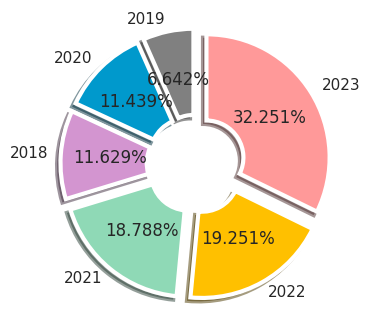

In [73]:
pie_Y = filtered_df['Model Year'].value_counts()
pie_Y

x_label = ['2023', '2022', '2021', '2018', '2020', '2019']
plt.pie(pie_Y,
        labels=x_label,
        autopct = '%.3f%%',
        startangle = 90,# 90도 부터 시작
        counterclock = False,# 시계 반대방향 False
        explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],# 파이 거리
        shadow = True,
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#0099cc', '#808080'],
        wedgeprops = {'width':0.7 , 'edgecolor':'w' , 'linewidth':3}) # pie 차트를 도넛모양으로 고른다면 wedgeprops 쓰자
plt.show()

In [ ]:
plt.bar(df4['Model Year'], df4['Postal Code'],
        color = 'pink',
        alpha = 0.6,
        width = 0.4)
plt.title('Sum of Tip By Days')
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Sum of tips', fontsize = 14)
plt.xticks(
           df4['Model Year'],
           rotation = 45,
           fontsize = 15)
plt.show()

In [ ]:
cols = ['County', 'City', 'Model Year	', 'Make', 'Model']

In [ ]:
sorted = df3['Electric Vehicle Type'].groupby()

Battery Electric Vehicle (BEV)            130293
Plug-in Hybrid Electric Vehicle (PHEV)     36507
Name: Electric Vehicle Type, dtype: int64

In [ ]:
# -----------------------------------------------------------

In [ ]:
# 최빈값으로 결측치 채우기 ==> 엄청난 중복치 생성
a = df2['County'].mode()[0]
b = df2['City'].mode()[0]
c = df2['Postal Code'].mode()[0]
d = df2['Legislative District'].mode()[0]
e = df2['Vehicle Location'].mode()[0]
f = df2['Electric Utility'].mode()[0]
g = df2['2020 Census Tract'].mode()[0]

df2['County'] = df2['County'].fillna(a)
df2['City'] = df2['City'].fillna(b)
df2['Postal Code'] = df2['Postal Code'].fillna(c)
df2['Legislative District'] = df2['Legislative District'].fillna(d)
df2['Vehicle Location'] = df2['Vehicle Location'].fillna(e)
df2['Electric Utility'] = df2['Electric Utility'].fillna(f)
df2['2020 Census Tract'] = df2['2020 Census Tract'].fillna(g)
df2.isnull().sum()

County                   0
City                     0
State                    0
Postal Code              0
Make                     0
Model                    0
Electric Vehicle Type    0
Legislative District     0
Vehicle Location         0
Electric Utility         0
2020 Census Tract        0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2, random_state=2024, shuffle = True)
train.shape, test.shape

((133440, 6), (33360, 6))

In [ ]:
target = train.pop('Vehicle Location')
test.drop(['Vehicle Location'], axis = 1, inplace = True)

In [ ]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [ ]:
base_src = './drive/MyDrive/전기차 분석 2024.02'
tr = base_src + '/train.csv'
tt = base_src + '/test.csv'

train = pd.read_csv(tr)
test = pd.read_csv(tt)

In [ ]:
# 빈도가 1인 값을 찾음
min_frequency_values = target.value_counts()[target.value_counts() == 1].index

# 해당 값들의 인덱스를 2로 바꿈
target = target.replace(min_frequency_values, 2)